In [179]:
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
from sklearn.model_selection import cross_validate, train_test_split
from sklearn.preprocessing import StandardScaler
from statistics import mean 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pyts.image import RecurrencePlot
from pyts.datasets import load_gunpoint

In [180]:
d = pd.read_csv('processedData.csv')
d.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,class
0,135,190,229,223,192,125,55,-9,-33,-38,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,0
1,386,382,356,331,320,315,307,272,244,232,...,164,150,146,152,157,156,154,143,129,1
2,-32,-39,-47,-37,-32,-36,-57,-73,-85,-94,...,57,64,48,19,-12,-30,-35,-35,-36,0
3,-105,-101,-96,-92,-89,-95,-102,-100,-87,-79,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,0
4,-9,-65,-98,-102,-78,-48,-16,0,-21,-59,...,4,2,-12,-32,-41,-65,-83,-89,-73,0


In [181]:
y = d['class'] #sets y to be class column 
X = d.iloc[:,0:(d.shape[1]-1)] #sets X to be dataset with class column removed 

In [182]:
#Shrinking data because I don't have 40GB of ram
X = X.iloc[0:100,:]
y = y.iloc[0:100]

In [183]:
print(X.shape)
print(y.shape)

(100, 178)
(100,)


In [184]:
X

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178
0,135,190,229,223,192,125,55,-9,-33,-38,...,8,-17,-15,-31,-77,-103,-127,-116,-83,-51
1,386,382,356,331,320,315,307,272,244,232,...,168,164,150,146,152,157,156,154,143,129
2,-32,-39,-47,-37,-32,-36,-57,-73,-85,-94,...,29,57,64,48,19,-12,-30,-35,-35,-36
3,-105,-101,-96,-92,-89,-95,-102,-100,-87,-79,...,-80,-82,-81,-80,-77,-85,-77,-72,-69,-65
4,-9,-65,-98,-102,-78,-48,-16,0,-21,-59,...,10,4,2,-12,-32,-41,-65,-83,-89,-73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,-40,-42,-45,-44,-39,-38,-44,-62,-89,-124,...,31,32,26,24,25,27,26,31,43,48
96,-10,-66,-85,-72,-24,32,116,189,207,195,...,51,102,122,87,35,0,-20,-9,3,17
97,-19,-21,-12,-21,-35,-63,-85,-99,-101,-95,...,-35,-28,-31,-44,-64,-90,-106,-128,-129,-129
98,54,43,30,32,34,41,26,6,-1,1,...,-60,-27,12,38,51,52,48,49,43,19


In [185]:
# Recurrence plot transformation
rp = RecurrencePlot(threshold='point', percentage=20)
X = rp.fit_transform(X)

In [186]:
X.shape

(100, 178, 178)

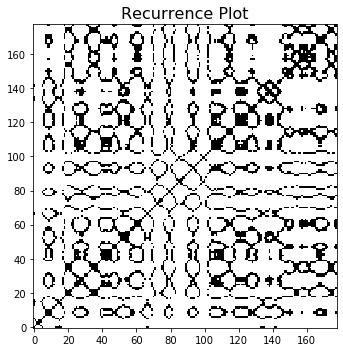

In [187]:
# Show the plot for the first time series
plt.figure(figsize=(5, 5))
plt.imshow(X[0], cmap='binary', origin='lower')
plt.title('Recurrence Plot', fontsize=16)
plt.tight_layout()
plt.show()

In [188]:
#Need to flatten images into arrays. Each image is 178*178 pixels, so 
#each image flattened out should be a 31684 length row 
#(2000, 178, 178) dimension tensor becomes (2000, 31684) dimension matrix

In [189]:
X.shape

(100, 178, 178)

In [190]:
#X = X.transpose(2,1,0).reshape(2000,-1)
X = X.transpose(2,1,0).reshape(100,-1)

In [191]:
X.shape

(100, 31684)

In [192]:
#Don't ask me how this works.

In [193]:
#Scaling data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X) 
X = scaler.transform(X)
#I tried NOT scaling the data as well. Either way, all the models perform badly. 

In [194]:
#Train test split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) 

In [195]:
from sklearn.neighbors import KNeighborsClassifier 
modelKNN = KNeighborsClassifier()   
modelKNN.fit(X_train, y_train)
print(classification_report(y_test,modelKNN.predict(X_test)))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89        16
           1       0.00      0.00      0.00         4

    accuracy                           0.80        20
   macro avg       0.40      0.50      0.44        20
weighted avg       0.64      0.80      0.71        20



c:\program files\python37\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [196]:
from sklearn import svm
modelSVM = svm.SVC(gamma=0.001, C=100.) 
modelSVM.fit(X_train, y_train)
print(classification_report(y_test,modelSVM.predict(X_test)))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89        16
           1       0.00      0.00      0.00         4

    accuracy                           0.80        20
   macro avg       0.40      0.50      0.44        20
weighted avg       0.64      0.80      0.71        20



c:\program files\python37\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [197]:
##Logistic regression: 
from sklearn import linear_model
modelLR = linear_model.LogisticRegression(C=1e5, max_iter=1000)    
modelLR.fit(X_train, y_train)
print(classification_report(y_test, modelLR.predict(X_test)))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        16
           1       0.20      1.00      0.33         4

    accuracy                           0.20        20
   macro avg       0.10      0.50      0.17        20
weighted avg       0.04      0.20      0.07        20



c:\program files\python37\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [198]:
##Random forests
from sklearn.ensemble import RandomForestClassifier
modelRF=RandomForestClassifier(n_estimators=1000)   
modelRF.fit(X_train, y_train)
print(classification_report(y_test, modelRF.predict(X_test)))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89        16
           1       0.00      0.00      0.00         4

    accuracy                           0.80        20
   macro avg       0.40      0.50      0.44        20
weighted avg       0.64      0.80      0.71        20



c:\program files\python37\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [199]:
##Neural network: 
from sklearn.neural_network import MLPClassifier
modelNN = MLPClassifier(hidden_layer_sizes=(5,5,5), max_iter=500) 
modelNN.fit(X_train, y_train)
print(classification_report(y_test,modelNN.predict(X_test)))

              precision    recall  f1-score   support

           0       0.67      0.12      0.21        16
           1       0.18      0.75      0.29         4

    accuracy                           0.25        20
   macro avg       0.42      0.44      0.25        20
weighted avg       0.57      0.25      0.23        20



c:\program files\python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [ ]:
#KNN
from sklearn.neighbors import KNeighborsClassifier 
modelKNN = KNeighborsClassifier()   

In [ ]:
##Logistic regression: 
from sklearn import linear_model
modelLR = linear_model.LogisticRegression(C=1e5, max_iter=1000)  

In [ ]:
##Random forests
from sklearn.ensemble import RandomForestClassifier
modelRF=RandomForestClassifier(n_estimators=1000)  

In [ ]:
##Neural network: 
from sklearn.neural_network import MLPClassifier
modelNN = MLPClassifier(hidden_layer_sizes=(5,5,5), max_iter=500) 

In [ ]:
from CVreportingFramework import hugeFramework
hugeFramework(modelKNN, modelLR, modelNN, modelRF, X, y)